In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# Select a style, it will affect all subsequent plots.
plt.style.use('seaborn')

# Add this after your imports to configure Jupyter to 
# display your plots.
%matplotlib inline

# Matplotlib Subplots

In [2]:
seattle_weather_2015_2016 = pd.read_csv(
    './data/seattle_weather_2015_2016.csv')
seattle_weather_2015_2016.head()

,date,low_temp,high_temp,precipitation,snowfall,snowdepth,avgwindspeed,fog,mist,rain,ice,snow,freezingrain,thunder,highwind,hail
0,1/1/15,23.2,51.1,0.00,0.0,0.0,4.70,No,No,No,No,No,No,No,No,No
1,1/2/15,41.0,54.0,0.00,0.0,0.0,2.91,No,No,No,No,No,No,No,No,No
2,1/3/15,46.0,51.1,0.16,0.0,0.0,3.80,Yes,No,No,No,No,No,No,No,No
3,1/4/15,48.9,69.1,0.29,0.0,0.0,10.07,Yes,No,No,No,No,No,No,No,No
4,1/5/15,32.0,55.9,0.00,0.0,0.0,5.37,No,No,No,No,No,No,No,No,No


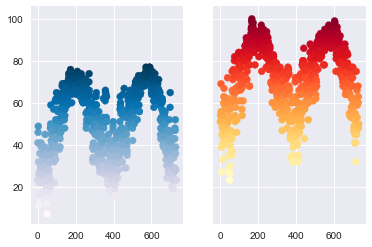

In [4]:
figure, axes = plt.subplots(1, 2, sharey=True)

axes[0].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

axes[1].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['high_temp'],
             c=seattle_weather_2015_2016['high_temp'], 
             cmap='YlOrRd')

## Activity: Four Subplots

We will use flight_sample.csv for this activity

* Use subplots to plot the following 4 (2x2) plots in a single figure

    * Plot the histogram of the DISTANCE travelled by all the flights
    * Plot the histogram of the DISTANCE travelled by **only** UA flights
    * Plot the histogram of the DISTANCE travelled by **only** HA flights
    * Plot the histogram of the DISTANCE travelled by **only** B6 flights
    * Add Title to each plot
* Does it make sense to share any axis (sharex or sharey) in this case? 

In [6]:
flights = pd.read_csv("./data/flight_sample.csv")
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
0,2015,8,19,3,EV,3260,7.0,20.0,1091
1,2015,9,23,3,WN,3050,4.0,9.0,837
2,2015,10,16,5,AA,1382,13.0,25.0,761
3,2015,1,19,1,WN,4274,5.0,23.0,1547
4,2015,4,22,3,WN,2237,5.0,18.0,872


In [9]:
# get the distance for the three airlines
ua = flights[ flights['AIRLINE'] == 'UA']
ha = flights[ flights['AIRLINE'] == 'HA']
b6 = flights[ flights['AIRLINE'] == 'B6']

Text(0.5, 1.0, 'All Airlines')

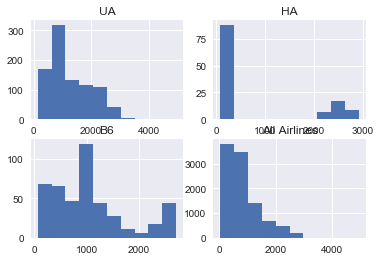

In [15]:
# Plot the data

fig,ax = plt.subplots(2,2)
ax[0,0].hist(ua['DISTANCE'])
ax[0,0].set_title("UA")

ax[0,1].hist(ha['DISTANCE'])
ax[0,1].set_title("HA")

ax[1,0].hist(b6['DISTANCE'])
ax[1,0].set_title("B6")

ax[1,1].hist(flights['DISTANCE'])
ax[1,1].set_title("All Airlines")

# Plotting with Seaborn 

Seaborn provides more sophistication on top of Matplotlib that makes them produce plots that more statistical and integrates with the functionality provided by Pandas DataFrame 

In [16]:
import seaborn as sns

Remember, plotting of histogram using Matplotlib from above. 

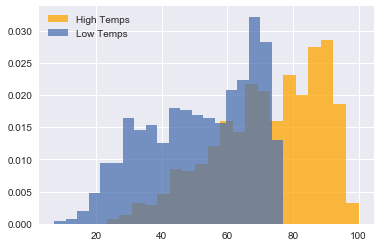

In [17]:
figure, axes = plt.subplots()
axes.hist(
    seattle_weather_2015_2016['high_temp'], 
    bins=20, 
    label='High Temps', # Use label to specify legend name
    color='orange', # Override the default color
    alpha=.75, # Adjust alpha to allow both datasets to appear
    density=True # Set y-axis as probability. 
)
axes.hist(
    seattle_weather_2015_2016['low_temp'], 
    bins=20, 
    label='Low Temps', # Use label to specify legend name
    alpha=.75, # Adjust alpha to allow both datasets to appear
    density=True # Set y-axis as probability. 
)

# Enable the legend
axes.legend()

Note, that above when you set `normed=True`, the y-axis doesn't represent the frequency but the probability of falling in that bucket.

With **seaborn** we can plot these histogram and also a curve that shows the distribution. 

Text(0, 0.5, 'Probability Denisty')

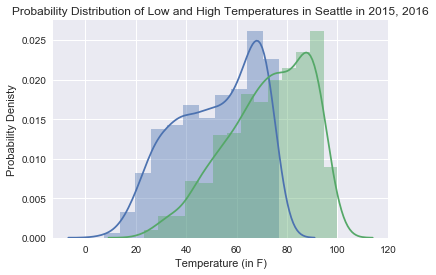

In [18]:
figure, axes = plt.subplots()

sns.distplot(seattle_weather_2015_2016['low_temp'], ax= axes)
sns.distplot(seattle_weather_2015_2016['high_temp'], ax = axes)

axes.set_title("Probability Distribution of Low and High Temperatures in Seattle in 2015, 2016")
axes.set_xlabel("Temperature (in F)")
axes.set_ylabel("Probability Denisty")

### Pair plots

These are very useful when you start working with any data. You might want to understand how each variable is related to one another. 

Seaborn is smart to figure out DataFrames which are numbers and only compare across them. 

In [19]:
seattle_weather_2015_2016.head()

,date,low_temp,high_temp,precipitation,snowfall,snowdepth,avgwindspeed,fog,mist,rain,ice,snow,freezingrain,thunder,highwind,hail
0,1/1/15,23.2,51.1,0.00,0.0,0.0,4.70,No,No,No,No,No,No,No,No,No
1,1/2/15,41.0,54.0,0.00,0.0,0.0,2.91,No,No,No,No,No,No,No,No,No
2,1/3/15,46.0,51.1,0.16,0.0,0.0,3.80,Yes,No,No,No,No,No,No,No,No
3,1/4/15,48.9,69.1,0.29,0.0,0.0,10.07,Yes,No,No,No,No,No,No,No,No
4,1/5/15,32.0,55.9,0.00,0.0,0.0,5.37,No,No,No,No,No,No,No,No,No


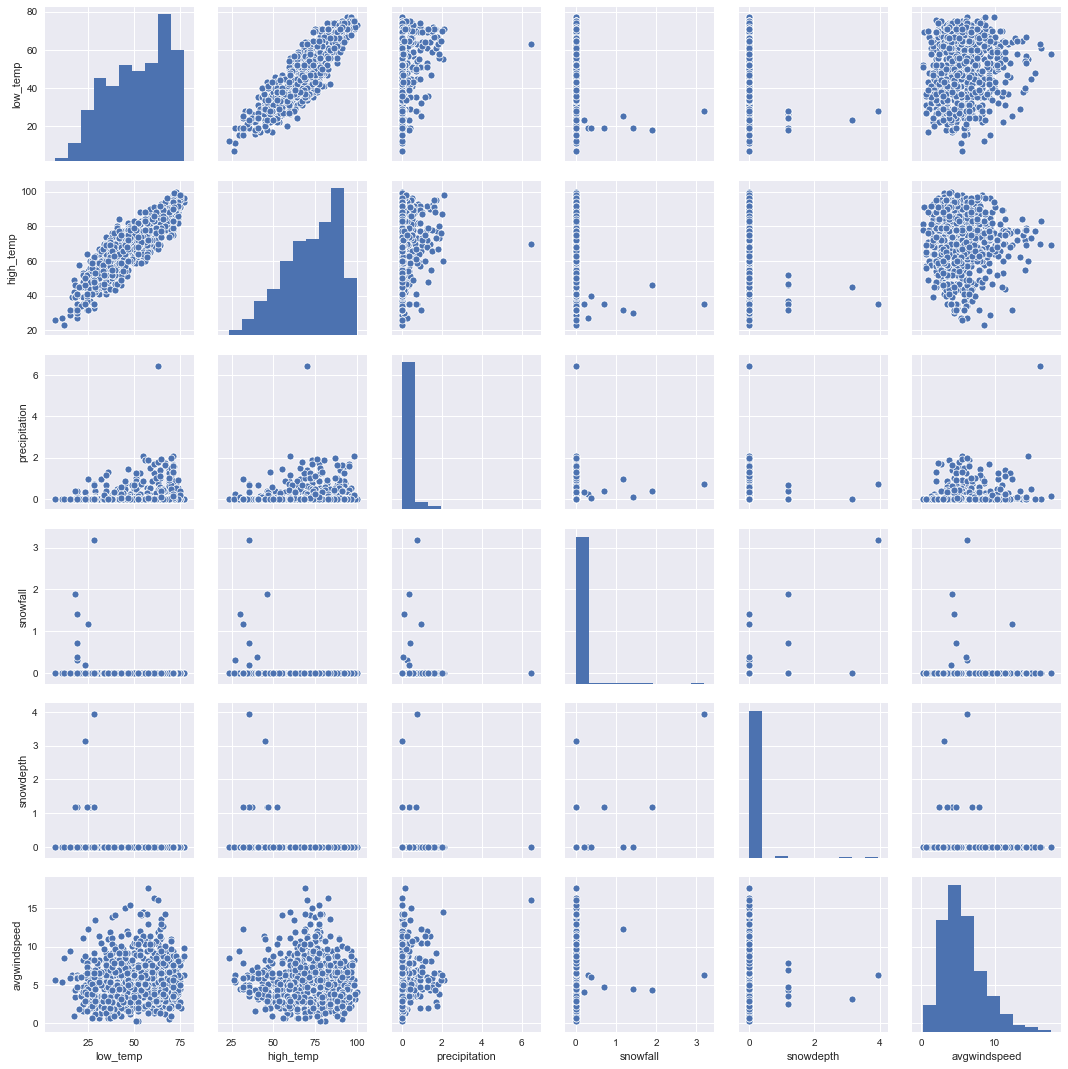

In [20]:
sns.pairplot(seattle_weather_2015_2016)

### Joint plot

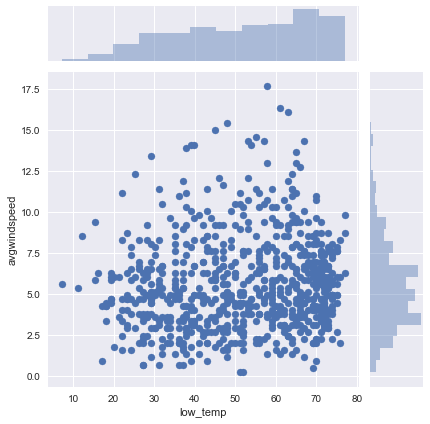

In [21]:
jp = sns.jointplot("low_temp", "avgwindspeed", data=seattle_weather_2015_2016)

## Activty

Use seaborn to produce these plots. 

1. Select the flight details of American Airlines ('AA') and United Airlines ('UA')
2. Plot the histogram with probability density plot for the distance of the flights by these two airlines


In [22]:
flights = pd.read_csv("./data/flight_sample.csv")
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
0,2015,8,19,3,EV,3260,7.0,20.0,1091
1,2015,9,23,3,WN,3050,4.0,9.0,837
2,2015,10,16,5,AA,1382,13.0,25.0,761
3,2015,1,19,1,WN,4274,5.0,23.0,1547
4,2015,4,22,3,WN,2237,5.0,18.0,872


In [23]:
ua = flights[ flights['AIRLINE'] == 'UA']
aa = flights[ flights['AIRLINE'] == 'AA']

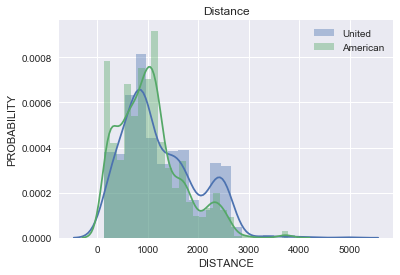

In [28]:
fig, axes = plt.subplots()
sns.distplot(ua['DISTANCE'], ax=axes, label="United")
sns.distplot(aa['DISTANCE'], ax=axes, label="American")

axes.set_title("Distance")
axes.set_ylabel("PROBABILITY")
axes.legend()

## Activity

* Pairplot on flights DataFrame

In [29]:
# pairplots are not good working with missing data, so we dropping it. 
# EASY TO DO BUT NOT ALWAYS A RIGHT THING TO DO 
flights = pd.read_csv("./data/flight_sample.csv")
flights.dropna(inplace=True)

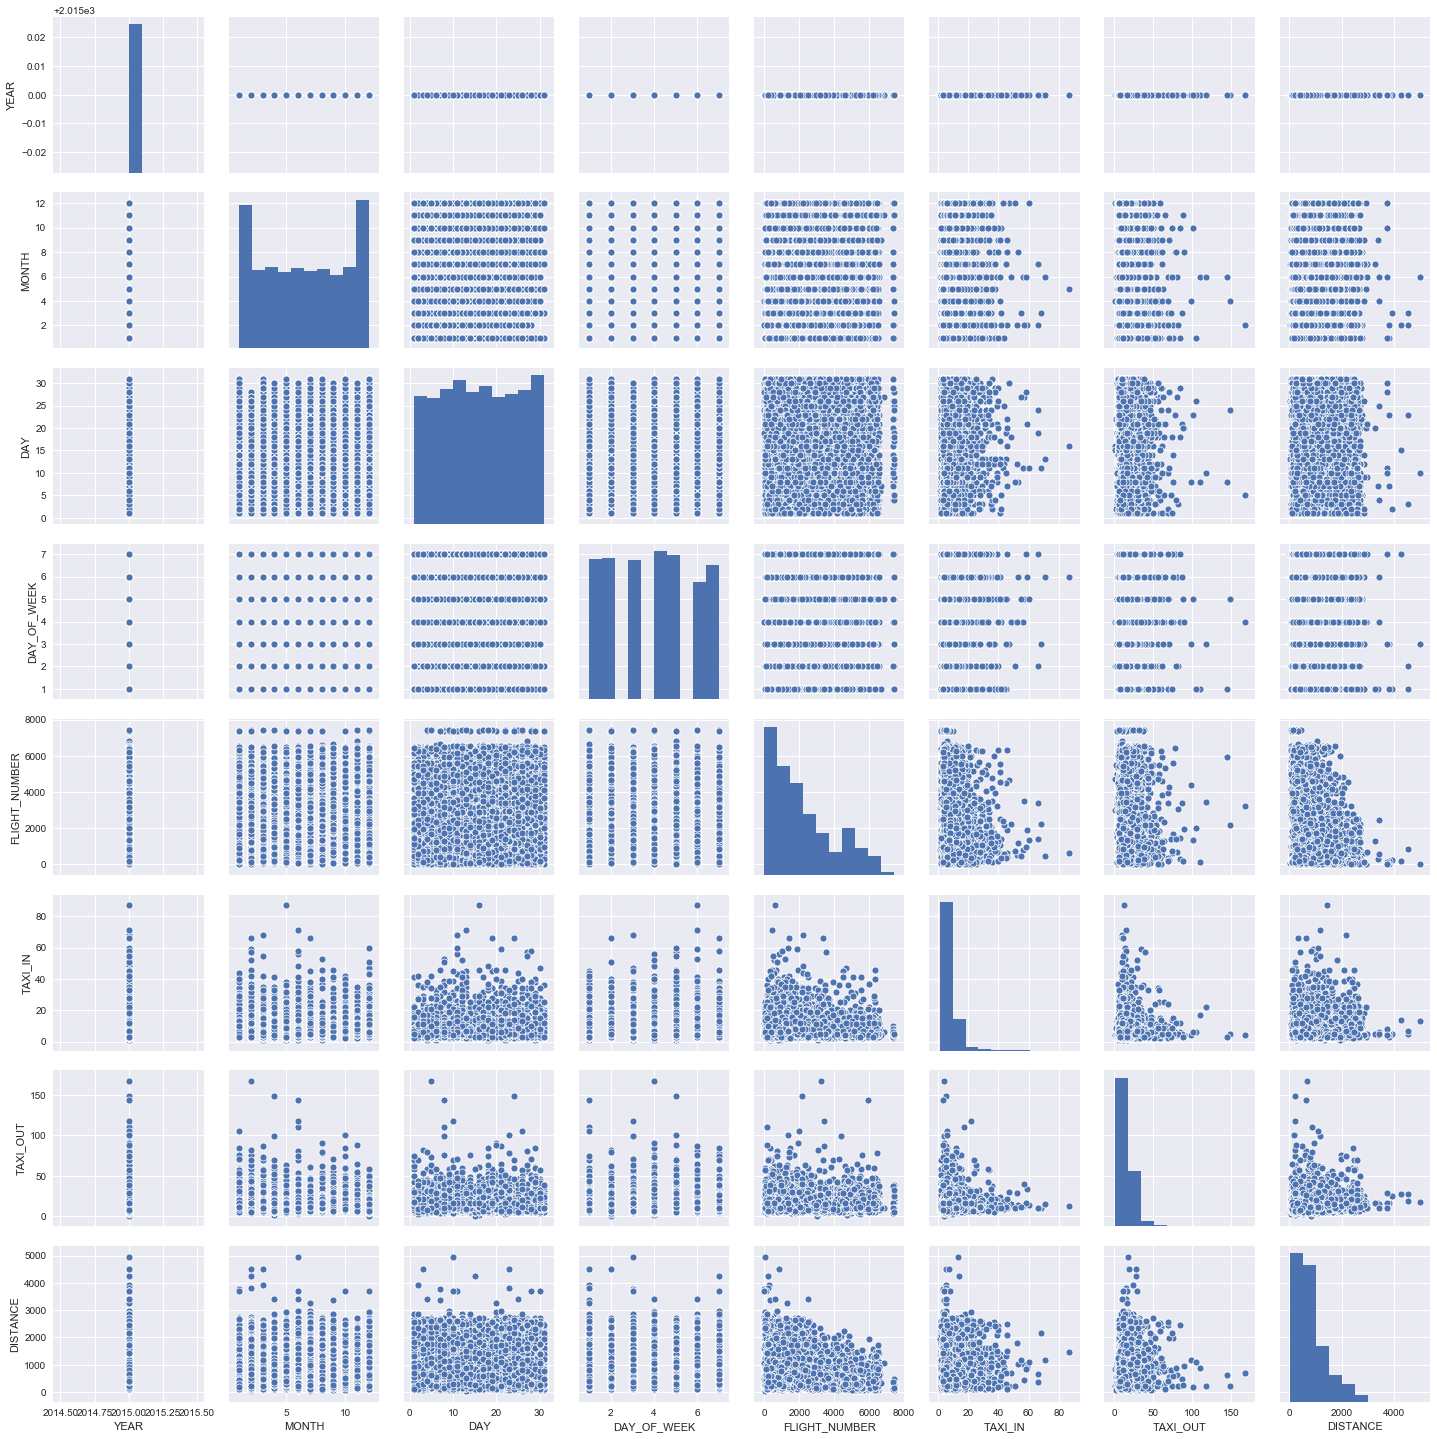

In [30]:
sns.pairplot(flights)

## Activity

* Joint plot between DISTANCE and TAXI_OUT time for flights data
* Joint plot between DISTANCE and TAXI_IN time for flights data

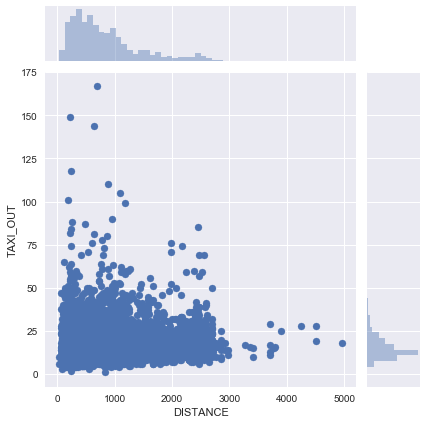

In [31]:
sns.jointplot("DISTANCE", "TAXI_OUT", data=flights)

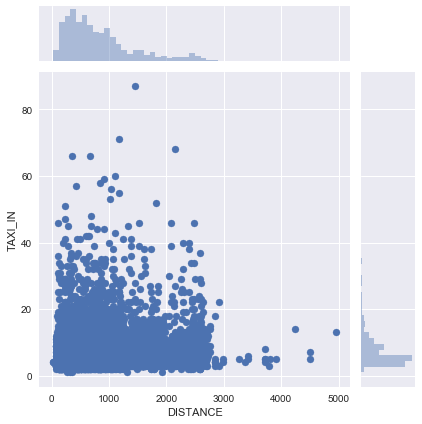

In [32]:
sns.jointplot("DISTANCE", "TAXI_IN", data=flights)

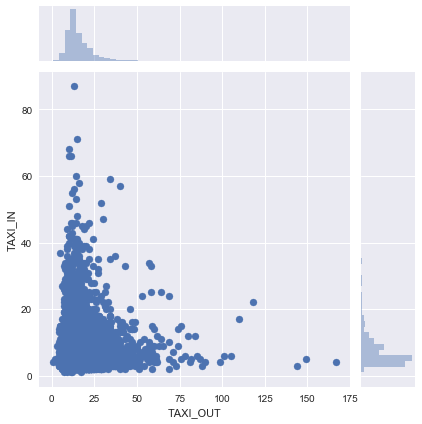

In [33]:
sns.jointplot("TAXI_OUT", "TAXI_IN", data=flights)

# Bar Plots in Matplotlib

Simple Line plots and Histograms are very useful when you have quantitative (continous) data type. Bar plots are useful for plotting **categorical** data types. 

In [34]:
flights = pd.read_csv("./data/flight_sample.csv")

Let us say you want to find how flights are in the dataset corresponding to each airline. 

You can do this by groupby() and the size() to find the number of airlines in each group.

In [35]:
flights_by_Airline = flights.groupby(["AIRLINE"])
num_flights_airline = flights_by_Airline.size()
num_flights_airline

AIRLINE
AA    1216
AS     311
B6     450
DL    1518
EV    1001
F9     143
HA     121
MQ     510
NK     211
OO    1027
UA     894
US     300
VX     110
WN    2188
dtype: int64

Text(0.5, 1.0, 'The distribution of flights across airlines')

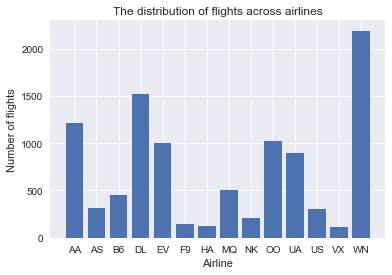

In [40]:
figure, axes = plt.subplots()

axes.bar(  range( len(num_flights_airline.index)  ), num_flights_airline)

# This below line will set the ticks at every number
axes.set_xticks( range(len(num_flights_airline.index)))

# This below line will renamed the ticks from numbers to the airlines
axes.set_xticklabels(num_flights_airline.index)

axes.set_xlabel("Airline")
axes.set_ylabel("Number of flights")
axes.set_title("The distribution of flights across airlines")

#### Tight integration with pandas

Instead of writing such a long code. The matplotlib is tightly integrated with pandas. So you can write simple code as below

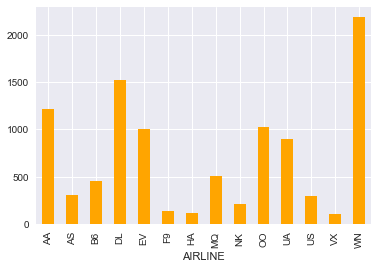

In [41]:
figure, axes = plt.subplots()
num_flights_airline.plot(ax=axes, kind='bar', color='orange')

**Wow** That was easy! 

Plotting bar plots has a lot more features. Look [here](https://matplotlib.org/examples/api/barchart_demo.html) for more examples. 

# Activity

* Group the flights by 'MONTH' and find the number of flights in each month. 

* Plot a *bar* plot with each month on the x-axis and the height of the bar indicating the number of flights
    * Make sure you set the ticks to be from 1 to 12 using axes.set_xticks() method. 
    * Make sure you rename the ticks to be 'Jan', 'Feb', 'Mar', 'Apr',..., 'Dec' using axes.set_xticklabels() method. 

In [44]:
# wrangle the data
flights_by_month = flights.groupby(['MONTH'])
flight_count_by_month = flights_by_month.size()
flight_count_by_month

MONTH
1     825
2     765
3     854
4     884
5     823
6     871
7     839
8     857
9     786
10    878
11    816
12    802
dtype: int64

Text(0, 0.5, 'Distance in Miles')

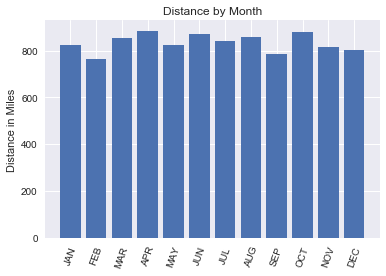

In [55]:
# plot the data
# you can use the following array for x labels:
months = ['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

month_nums = range(1,13)

fig,ax = plt.subplots()

ax.bar(flight_count_by_month.index, flight_count_by_month)

ax.set_xticks(flight_count_by_month.index)
ax.set_xticklabels(months, rotation=70)

ax.set_title("Distance by Month")
ax.set_ylabel("Distance in Miles")

## Bar plots with multiple bars

In [56]:
flights_month_airline = flights.groupby(["AIRLINE", "MONTH"])
num_flights_month_airline = flights_month_airline.size()
num_flights_month_airline.head()

AIRLINE  MONTH
AA       1        88
         2        74
         3        89
         4        87
         5        80
dtype: int64

In [57]:
num_flights_month_airline.loc['AA']

MONTH
1      88
2      74
3      89
4      87
5      80
6      62
7     116
8     129
9     123
10    119
11    121
12    128
dtype: int64

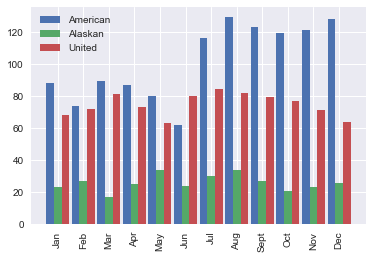

In [66]:
figure, axes = plt.subplots()

width = .3

axes.bar(num_flights_month_airline.loc['AA'].index - width, num_flights_month_airline['AA'], 
         width=width, 
         label = "American")
axes.bar(num_flights_month_airline.loc['AS'].index, num_flights_month_airline['AS'], 
         width=width,
         label = "Alaskan")
axes.bar(num_flights_month_airline.loc['UA'].index + width, num_flights_month_airline['UA'], 
         width=width,
         label = "United")

axes.set_xticks(range(1,13))

axes.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'], rotation=90)

axes.legend()

# Activity

* GroupBy 'AIRLINE', 'DAY_OF_WEEK' and find the number of flights in each day.  

* Plot multiple bars for number of flights three airlines: Southwest (WN), JetBlue (B6), and Hawaiin (HA) for each of the seven days. 
    * Make sure you set the ticks to be from 1 to 7 using axes.set_xticks() method. 
    * Make sure you rename the ticks to be 'Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun' using axes.set_xticklabels() method. 

In [68]:
# group by airline and day of week
# aggregate the number of records
by_airline_and_day = flights.groupby(['AIRLINE', 'DAY_OF_WEEK'])
counts_by_airline_and_day = by_airline_and_day.size()
counts_by_airline_and_day
counts_by_airline_and_day.loc['AA']

DAY_OF_WEEK
1    171
2    163
3    151
4    185
5    213
6    154
7    179
dtype: int64

Text(0.5, 1.0, 'distance by day of week per airline')

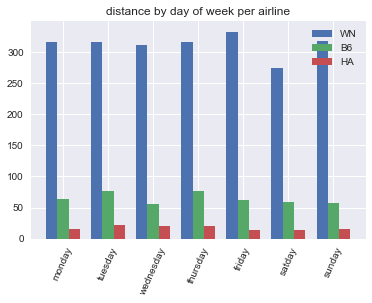

In [94]:
# you can use this array for tick labels:
days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'satday', 'sunday']

fig,ax = plt.subplots()
# plot the bar chart
width = .25
ax.bar(
    counts_by_airline_and_day.loc['WN'].index - width, 
    counts_by_airline_and_day.loc['WN'], 
    width=width, label="WN"
    )

ax.bar(
    counts_by_airline_and_day.loc['B6'].index, 
    counts_by_airline_and_day.loc['B6'], 
    width=width, label="B6"
    )

ax.bar(
    counts_by_airline_and_day.loc['HA'].index + width, 
    counts_by_airline_and_day.loc['HA'], 
    width=width, label="HA"
    
    )

ax.set_xticks(range(1,8))
ax.set_xticklabels(days, rotation=66)
ax.legend()
ax.set_title("distance by day of week per airline")

# Activity

* GroupBy 'AIRLINE', 'DAY_OF_WEEK' and compute the median distance travelled per airline per day. 

* Plot multiple bars for median distance travelled by flights of three airlines: Southwest (WN), JetBlue (B6), and Hawaiin (HA) for each of the seven days
    * Make sure you set the ticks to be from 1 to 7 using axes.set_xticks() method. 
    * Make sure you rename the ticks to be 'Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun' using axes.set_xticklabels() method. 

# Matplotlib Advanced Customizations

## Adjusting Plot Sizes
Often times, you will want to adjust the size of your plots. There are a couple of different ways that you can accomplish this.

In [3]:
nd_football_roster = pd.read_csv('./data/nd-football-2018-roster.csv')

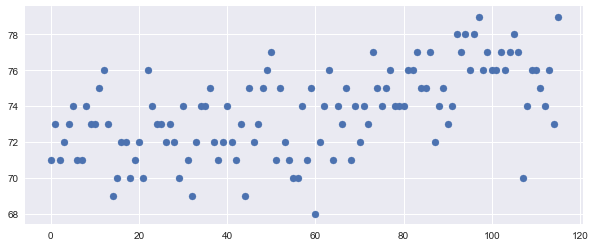

In [4]:
figure, axes = plt.subplots()
axes.scatter(nd_football_roster.index, nd_football_roster['Height'])

# You can use the `figure.set_size_inches()` method to 
# specify the desired width/height of your figure.
# If the requested size is too big for the Jupyter 
# display, Matplotlib will display a plot that still
# has the correct display ratio.
figure.set_size_inches(10, 4)

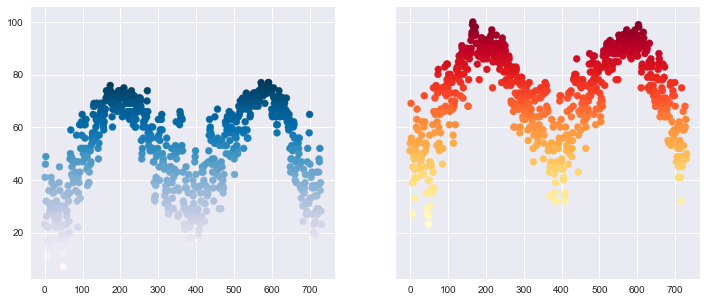

In [5]:
# You can also pass the `figsize` argument to `plt.subplots()`
# to accomplish the same effect.
figure, axes = plt.subplots(1, 2, sharey=True, figsize=(12,5))

axes[0].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

axes[1].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['high_temp'],
             c=seattle_weather_2015_2016['high_temp'], 
             cmap='YlOrRd')


## Adding Text to Plots
Sometimes, you may want to add explanatory text to your plots.

In its most basic usage, you simply specify x and y values and the text that you want to display.

Text(175, 15, 'WAY TOO COLD')

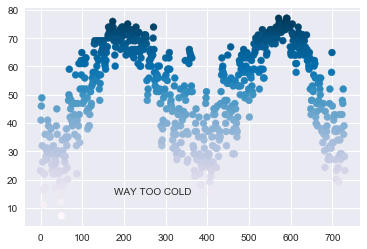

In [6]:
figure, axes = plt.subplots()

axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

axes.text(175, 15,'WAY TOO COLD')


You can also specify a number of parameters to customize the text's position and appearance:

Text(175, 15, 'WAY TOO COLD')

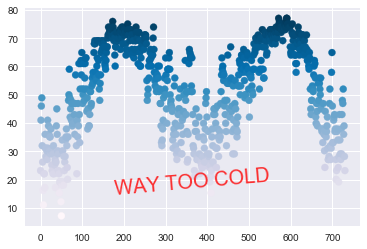

In [7]:
figure, axes = plt.subplots()

axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

axes.text(175, 15,'WAY TOO COLD', 
          size=20, # Adjust the size
          alpha=.8, # Adjust opacity
          color='red', # Change the color
          rotation=5 # Add a rotation
         )

There are a lot more customizations and advanced plotting possible using matplotlib

1. Adding Annotations (Text with Lines)
2. Customizing Tick Marks
    * Modifying the Number & Position of Tick Marks
3. Visualizing Error Bars
4. Fancy texts on your plots, including mathematical notations
5. Three dimensional plotting
6. Geographic Plotting

# Three-Dimensional Plotting in Matplotlib

Matplotlib was initially designed with only two-dimensional plotting in mind.
Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization.
three-dimensional plots are enabled by importing the ``mplot3d`` toolkit, included with the main Matplotlib installation:

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# Select a style, it will affect all subsequent plots.
# plt.style.use('seaborn')

%matplotlib notebook

In [2]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword ``projection='3d'`` to any of the normal axes creation routines:

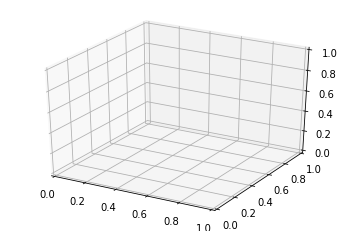

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types. 
Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook; recall that to use interactive figures, you can use ``%matplotlib notebook`` rather than ``%matplotlib inline`` when running this code.

## Three-dimensional Points and Lines

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples.
In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ``ax.plot3D`` and ``ax.scatter3D`` functions.
The call signature for these is nearly identical to that of their two-dimensional counterparts, so you can refer to [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) and [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb) for more information on controlling the output.
Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:

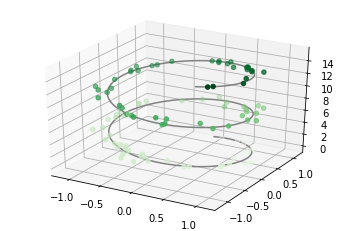

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [5]:
flights = pd.read_csv("./data/flight_sample.csv")

Text(0.5, 0, 'TAXI_OUT')

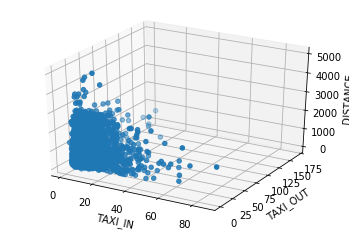

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.scatter3D(flights['TAXI_IN'], flights['TAXI_OUT'], flights['DISTANCE'], 'gray')

ax.set_zlabel('DISTANCE')
ax.set_xlabel('TAXI_IN')
ax.set_ylabel('TAXI_OUT')


## Three-dimensional Contour Plots

Analogous to the contour plots we explored in [Density and Contour Plots](04.04-Density-and-Contour-Plots.ipynb), ``mplot3d`` contains tools to create three-dimensional relief plots using the same inputs.
Like two-dimensional ``ax.contour`` plots, ``ax.contour3D`` requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point.
Here we'll show a three-dimensional contour diagram of a three-dimensional sinusoidal function:

In [7]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

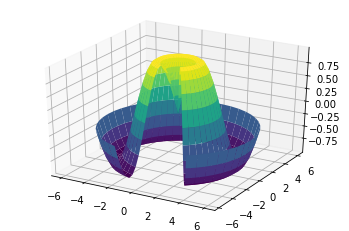

In [8]:
fig = plt.figure()
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,
                cmap='viridis', edgecolor='none');


# Detour: Exception Handling

Sometimes the interpreter will generate an error that will interrupt the execution of your program.  These are called exceptions and can be handled programmatically.

This part of the content if from [Chapter 10](https://automatetheboringstuff.com/chapter10/) of the your ABSP textbook. 

## `try` and `except` statements

In [9]:
10/0

ZeroDivisionError: division by zero

In [11]:
a = int(input("Number: "))

Number: foobar


ValueError: invalid literal for int() with base 10: 'foobar'

In [14]:
try:
    a = int(input("Number 1: "))
    b = int(input("Number 2: "))
    print(a/b)
except ValueError:
    print("Whoa, that's not an integer")
except ZeroDivisionError:
    print("Whoa, you can't divide by zero")

Number 1: 3
Number 2: 0
Whoa, you can't divide by zero


### `raise` statement

In [16]:
try:
    a = int(input("Number 1: "))
    if a<0:
        raise ValueError("Entered a Negative")
except ValueError:
    print("Whoa, there was an error!")
    raise

Number 1: -2
Whoa, there was an error!


ValueError: Entered a Negative

### `assert` statement

An assertion is a sanity check to make sure your code isn’t doing something obviously wrong. These sanity checks are performed by `assert` statements. If the sanity check fails, then an `AssertionError` exception is raised.

In [18]:
instructorName = input("Enter instructor name: ")

assert instructorName == 'Jonathan', "Wow! The instructor has to be Jonathan!"

Enter instructor name: Jonathan
